1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Test train split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

2. Loading and prehandling the dataset

In [ ]:
dataset = pd.read_csv(r"C:\Users\47036\Desktop\GCS_beta_500_v1.csv")
dataset

,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,BCUT2D_MWHI,BertzCT,Chi0,Chi0n,Chi0v,Chi1,...,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState8,HeavyAtomCount,NOCount,NumHAcceptors,NumHeteroatoms,MolMR,Log(Bitterness Concentration)
0,591.810,560.218,591.769141,240,29.686548,1446.332783,20.544030,19.996796,23.157952,20.503079,...,-1.919973,-3.041147,6.497545,0.106113,28,14,13,15,151.4827,-67.230240
1,195.338,187.802,194.740340,81,23.670848,213.028842,12.187771,7.570212,7.977112,8.338182,...,3.943644,3.619688,15.728089,6.584022,20,2,1,2,61.7810,-49.922253
2,502.817,460.308,509.680539,152,25.250810,491.025781,32.383419,17.420225,18.911392,17.716644,...,-0.230344,0.010240,15.083926,3.882896,36,3,13,6,136.9944,-162.425612
3,672.375,634.094,671.553155,247,32.002388,1851.195270,34.627899,24.710862,26.754005,25.212769,...,1.863601,-2.081709,14.722167,1.810013,51,10,8,10,176.1888,49.603243
4,299.075,271.784,300.273065,62,19.120301,306.069922,11.400980,10.522881,12.196491,9.384534,...,2.973533,-1.606543,-1.040242,0.489437,15,4,6,4,86.6620,-31.894309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,531.915,505.085,528.995233,177,34.032749,1100.178997,15.747212,18.066495,21.792691,18.393579,...,-1.957482,-3.711571,12.325455,4.642576,25,5,5,6,135.3696,-25.731171
496,213.594,207.576,215.497294,53,31.364065,1583.227660,11.445661,7.154029,7.986924,6.967695,...,-1.565474,-1.331013,0.009193,-0.154495,15,11,12,12,63.1728,-35.002408
497,454.685,416.182,457.154176,170,29.058759,1514.673915,29.991494,17.080767,18.263638,16.881983,...,2.650740,-1.089374,0.696164,0.767971,43,3,5,6,137.0423,69.031206
498,391.379,359.141,394.323041,79,22.224277,525.420798,17.917389,13.352802,15.002011,13.500131,...,8.464607,-1.540559,12.684477,0.072780,22,5,3,5,114.0903,-19.813127


In [ ]:
# Split data into features and target
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [ ]:
X

,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,BCUT2D_MWHI,BertzCT,Chi0,Chi0n,Chi0v,Chi1,...,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState8,HeavyAtomCount,NOCount,NumHAcceptors,NumHeteroatoms,MolMR
0,591.810,560.218,591.769141,240,29.686548,1446.332783,20.544030,19.996796,23.157952,20.503079,...,24.491263,-1.919973,-3.041147,6.497545,0.106113,28,14,13,15,151.4827
1,195.338,187.802,194.740340,81,23.670848,213.028842,12.187771,7.570212,7.977112,8.338182,...,5.350976,3.943644,3.619688,15.728089,6.584022,20,2,1,2,61.7810
2,502.817,460.308,509.680539,152,25.250810,491.025781,32.383419,17.420225,18.911392,17.716644,...,42.484803,-0.230344,0.010240,15.083926,3.882896,36,3,13,6,136.9944
3,672.375,634.094,671.553155,247,32.002388,1851.195270,34.627899,24.710862,26.754005,25.212769,...,14.568048,1.863601,-2.081709,14.722167,1.810013,51,10,8,10,176.1888
4,299.075,271.784,300.273065,62,19.120301,306.069922,11.400980,10.522881,12.196491,9.384534,...,1.173689,2.973533,-1.606543,-1.040242,0.489437,15,4,6,4,86.6620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,531.915,505.085,528.995233,177,34.032749,1100.178997,15.747212,18.066495,21.792691,18.393579,...,6.976327,-1.957482,-3.711571,12.325455,4.642576,25,5,5,6,135.3696
496,213.594,207.576,215.497294,53,31.364065,1583.227660,11.445661,7.154029,7.986924,6.967695,...,1.918510,-1.565474,-1.331013,0.009193,-0.154495,15,11,12,12,63.1728
497,454.685,416.182,457.154176,170,29.058759,1514.673915,29.991494,17.080767,18.263638,16.881983,...,12.153530,2.650740,-1.089374,0.696164,0.767971,43,3,5,6,137.0423
498,391.379,359.141,394.323041,79,22.224277,525.420798,17.917389,13.352802,15.002011,13.500131,...,0.461046,8.464607,-1.540559,12.684477,0.072780,22,5,3,5,114.0903


In [ ]:
y

,Log(Bitterness Concentration)
0,-67.230240
1,-49.922253
2,-162.425612
3,49.603243
4,-31.894309
...,...
495,-25.731171
496,-35.002408
497,69.031206
498,-19.813127


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 72)
(100, 72)
(400, 1)
(100, 1)


3.Linear Regression Model Training and Evaluation

In [ ]:
# Linear Regression model building
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
v = pd.DataFrame(regressor.coef_,index=['co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])

In [ ]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df

,Attribute,co-efficient
0,MolWt,3.628882
1,HeavyAtomMolWt,-1.484019
2,ExactMolWt,-2.658841
3,NumValenceElectrons,0.045088
4,BCUT2D_MWHI,-1.108783
...,...,...
67,HeavyAtomCount,1.575805
68,NOCount,5.457535
69,NumHAcceptors,-1.107356
70,NumHeteroatoms,-4.391896


In [ ]:
# Linear Regression Model Evaluation
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,-80.902669
1,95.029509
2,-86.578061
3,-125.940037
4,13.093408
...,...
95,111.270137
96,-81.584832
97,-31.251279
98,1.446894


In [ ]:
y_test

,Log(Bitterness Concentration)
241,-78.449454
448,69.980640
75,-83.597856
212,-116.692680
481,53.186422
...,...
145,77.517317
234,-91.325847
382,-39.536348
141,-1.199503


In [ ]:
# Test data error metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: {}'.format(regressor.score(X_test, y_test)))

Mean Absolute Error: 20.874788346634908
Mean Squared Error: 701.8733217552697
Root Mean Squared Error: 26.492891910006158
Variance score: 0.8877206108937966


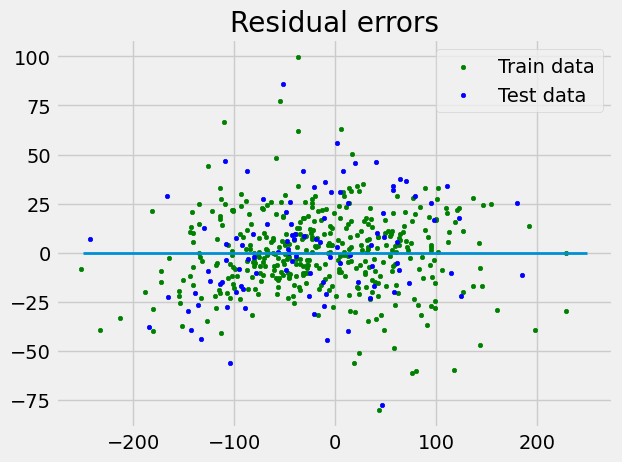

In [ ]:
# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(regressor.predict(X_train),
            regressor.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(regressor.predict(X_test),
            regressor.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=-250, xmax=250, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()

4.XGBoost Model Training and Evaluation

In [ ]:
import xgboost
import shap
import numpy as np
from sklearn.metrics import mean_squared_error as MSE


xgb_r = xgboost.XGBRegressor(objective ='reg:linear',
                      n_estimators = 60, max_depth = 1, subsample = 0.8, eta = 1)

xgb_r.fit(X_train, y_train)
# make predictions for test data
pred = xgb_r.predict(X_test)
pred

[20:05:07] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


array([-110.53244   ,   59.61402   ,  -36.31482   ,  -80.32097   ,
         62.188847  , -130.51201   ,  -17.112658  ,   19.443026  ,
        -41.52505   ,   77.51643   ,   32.372204  ,  -74.23968   ,
         42.45465   ,  -39.825367  ,  -34.736324  ,   76.366875  ,
         -8.09349   ,   23.895258  ,  -63.835182  ,  111.09689   ,
        -51.682938  , -192.88705   ,   14.65344   ,  -56.876953  ,
        131.39987   ,  -60.984028  ,  -18.847599  ,   31.285776  ,
         -5.7903147 ,  -14.429882  ,   -9.271055  ,   34.31278   ,
        -63.225765  ,  -84.75832   ,  -49.2418    ,   13.804973  ,
          0.94676757,  129.40103   , -102.497314  ,   -2.1923757 ,
        -41.318127  ,   43.81252   ,   16.226654  ,  -71.438156  ,
          3.7325926 , -100.18235   ,  -59.944557  , -105.30862   ,
        -42.29348   ,   35.674828  ,  -60.793026  , -129.65224   ,
        168.65324   , -116.193535  ,  -51.65199   ,  -15.478156  ,
        -65.19697   ,   38.39787   ,  -62.10765   ,   18.76449

In [ ]:
# XGBoost Test Set Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Variance score: {}'.format(xgb_r.score(X_test, y_test)))


Mean Absolute Error: 26.88730702347638
Mean Squared Error: 1138.0243693806115
Root Mean Squared Error: 33.734616781291756
Variance score: 0.8179490842272236


In [ ]:
# XGBoost Training Set Evaluation
pred2 = xgb_r.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred2)))
print('Variance score: {}'.format(xgb_r.score(X_train, y_train)))

Mean Absolute Error: 14.82442074753377
Mean Squared Error: 353.5216339311762
Root Mean Squared Error: 18.802170989839876
Variance score: 0.9476125492985124


5.Gaussian Process Regression Model Training and Evaluation

In [ ]:

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import r2_score

Standard Deviation: [31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766 31.6227766
 31.6227766 31.6227766 31.6227766 31.62277

The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.


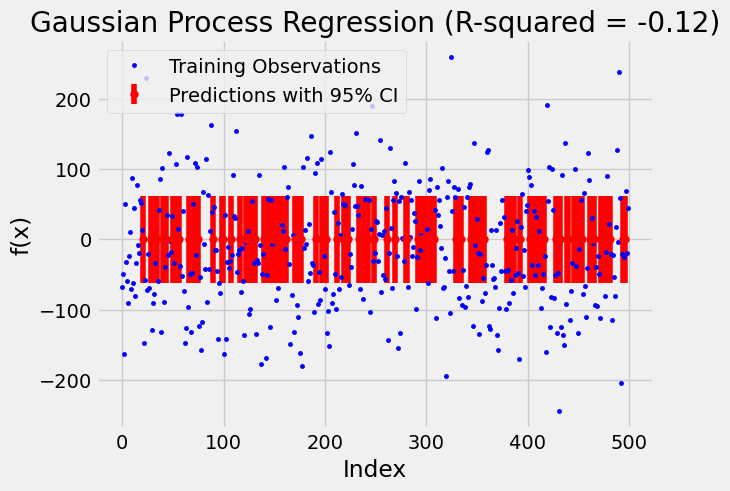

In [ ]:
# Define the kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Instantiate and fit the Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X_train, y_train)

# Predictions with standard deviation
y_pred, sigma = gp.predict(X_test, return_std=True)

# Assuming y_pred and y_test are in the correct shape, compute R-squared
r2_score_value = r2_score(y_test, y_pred)

# Assuming sigma is a 1D array containing the standard deviations of the predictions
sigma = sigma.reshape(-1)

# Print standard deviation and R-squared
print("Standard Deviation:", sigma)
print("R-squared:", r2_score_value)


plt.figure()
plt.errorbar(X_test.index, y_pred, yerr=1.96*sigma, fmt='r.', markersize=10, label='Predictions with 95% CI')
plt.plot(X_train.index, y_train, 'b.', markersize=5, label='Training Observations')
plt.xlabel('Index')
plt.ylabel('f(x)')
plt.title(f'Gaussian Process Regression (R-squared = {r2_score_value:.2f})')
plt.legend()
plt.show()

6.XGBoost SHAP analysis for Feature Importance Ranking

In [ ]:
# Explain xgboost model's predictions using SHAP
explainer = shap.TreeExplainer(xgb_r)
shap_values = explainer(X)

# Plot the SHAP values for the first prediction
shap.waterfall_plot(shap_values[0])



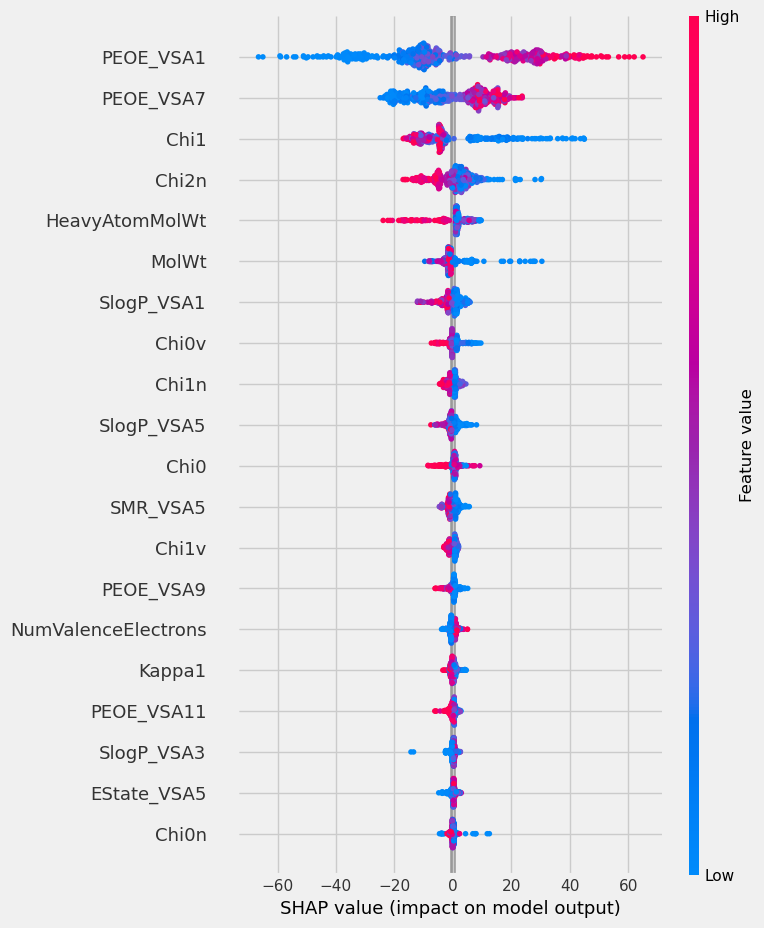

In [ ]:
shap.summary_plot(shap_values, X)

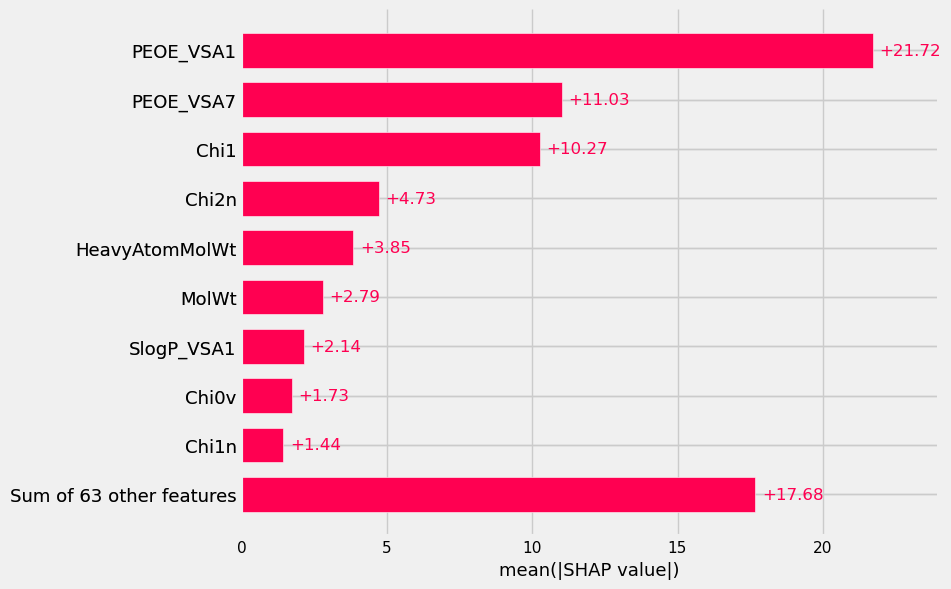

In [ ]:
shap.plots.bar(shap_values)

7. Feature Importance Ranking with RFE ranking, RandomForest And SelectKBest

In [ ]:
#RFE feature importance ranking
from sklearn.feature_selection import RFE
rfe = RFE(n_features_to_select=1, estimator=regressor)

In [ ]:
rfe = rfe.fit(X, y)

print('\n\nFEATUERS SELECTED\n\n')
print(rfe.support_)

print('\n\nRANKING OF FEATURES\n\n')
print(rfe.ranking_)



FEATUERS SELECTED


[False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


RANKING OF FEATURES


[ 7  8 66 67 19 68 10  2 33 39  3  4  1 17 72 60 22 13 21 45 14 24 52 18
 36 29 26 38  5 51 49 56 35 25 50 48 53 32 57 59 58 12 65 63 41 37 46 31
 30 69 55 27 43 71 47 23 64 70 61 16 44 28 62 15 54 20 34  9  6 42 11 40]


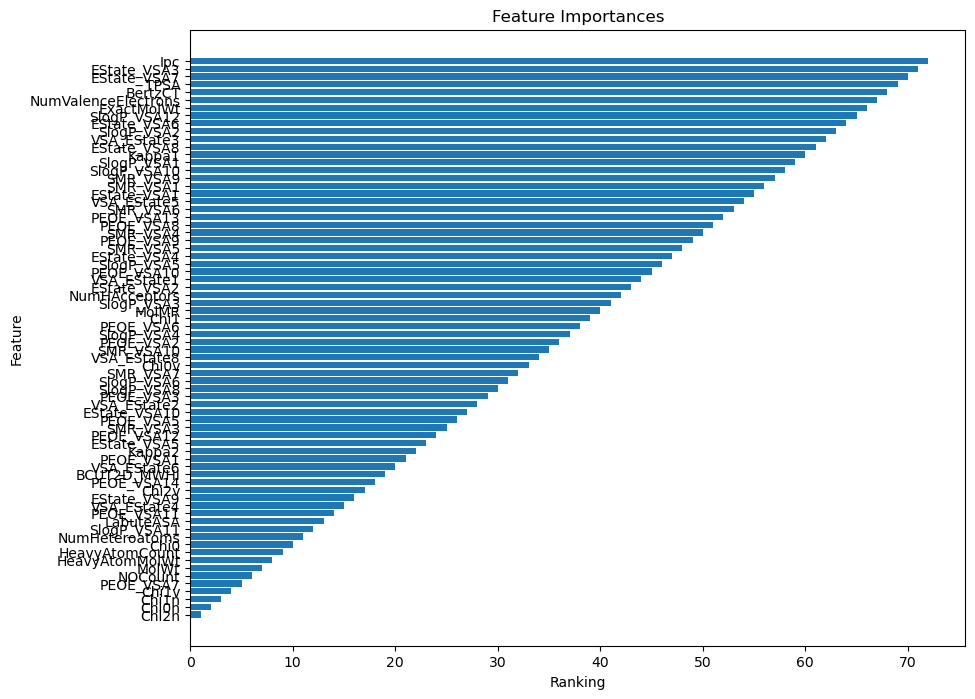

In [ ]:
feature_ranking = rfe.ranking_
feature_names = X.columns

# Create a DataFrame with feature names and their corresponding ranking
ranking_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranking})

# Sort the DataFrame by rank
ranking_df = ranking_df.sort_values('Rank')

# Plot the ranking
plt.figure(figsize=(10,8))
plt.barh(ranking_df['Feature'], ranking_df['Rank'])
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

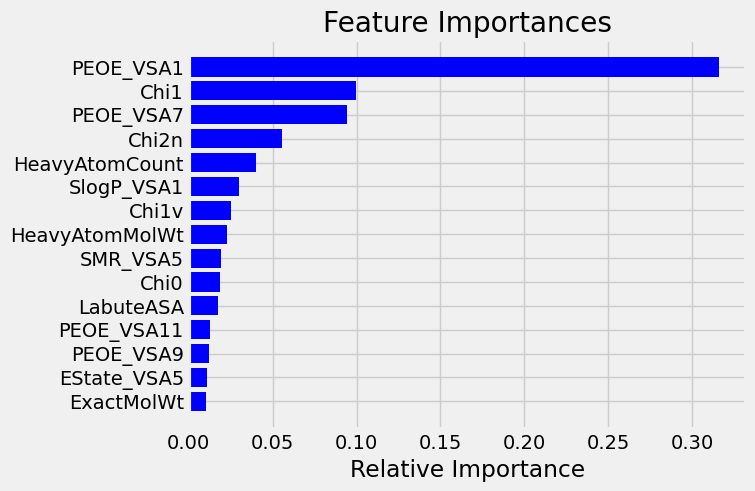

In [ ]:
# Feature Importance Ranking with RandomForest
from sklearn.ensemble import RandomForestRegressor
df=dataset.drop(['Log(Bitterness Concentration)'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df, dataset['Log(Bitterness Concentration)'])
features = dataset.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 15 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Feature Importance Ranking with SelectKBest
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

# define number of features to keep

k = 15

# perform feature selection

X_new = SelectKBest(f_regression, k=k).fit_transform(X, y)

# get feature names of selected features

selected_features = X.columns[SelectKBest(f_regression, k=k).fit(X, y).get_support()]

# print selected features

print(selected_features)

Index(['MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'Chi0n', 'Chi0v', 'Chi1',
       'Chi1n', 'Chi1v', 'Chi2n', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA7',
       'EState_VSA9', 'HeavyAtomCount', 'MolMR'],
      dtype='object')


D:\1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
